# DATA PREPARATION FOR CREDIT RISK PREDICTION

## 1. Analysis of Data

### 1.1. General Overview

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

with open(r"data/Training Data.csv", 'r') as f:
    df = pd.read_csv(f, index_col=[0])

df

,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
Id,,,,,,,,,,,,
1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0


### 1.2. Detailed Column by Column Analysis

### 1.2.1. Column "income"

In [2]:
print(f"Data Type: {df['income'].dtype}")
print(f"Minumum Value: {min(df['income'])}")
print(f"Maximum Value: {max(df['income'])}")
print(f"Average: {sum(df['income']) / len(df['income'])}")

Data Type: int64
Minumum Value: 10310
Maximum Value: 9999938
Average: 4997116.665333333


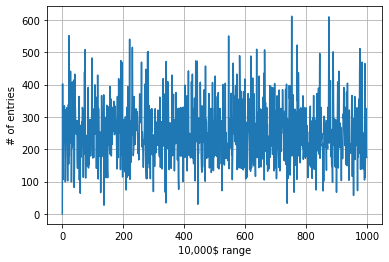

In [30]:
income_counts = np.zeros((max(df['income'])//10000 + 1,), dtype=int)
for i in df['income']:
    income_counts[i//10000] += 1

axes = plt.axes() 
axes.set_xlabel("10,000$ range")
axes.set_ylabel("# of entries")
plt.plot(range(len(income_counts)), income_counts)
plt.grid()

### 1.2.2. Column "age"

In [3]:
print(f"Data Type: {df['age'].dtype}")
print(f"Minimum Value: {min(df['age'])}")
print(f"Maximum Value: {max(df['age'])}")
print(f"Average: {sum(df['age']) / len(df['age'])}")

Data Type: int64
Minimum Value: 21
Maximum Value: 79
Average: 49.95407142857143


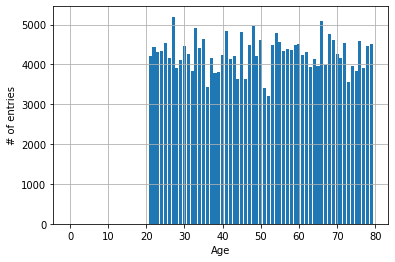

In [33]:
age_counts = np.zeros((max(df['age']) + 1,), dtype=int)
for i in df['age']:
    age_counts[i] += 1

axes = plt.axes() 
axes.set_xlabel("Age")
axes.set_ylabel("# of entries")
plt.bar(range(len(age_counts)), age_counts)
plt.grid()

### 1.2.3. Column "experience"

In [4]:
print(f"Data Type: {df['experience'].dtype}")
print(f"Minimum Value: {min(df['experience'])}")
print(f"Maximum Value: {max(df['experience'])}")
print(f"Average: {sum(df['experience']) / len(df['experience'])}")

Data Type: int64
Minimum Value: 0
Maximum Value: 20
Average: 10.084436507936507


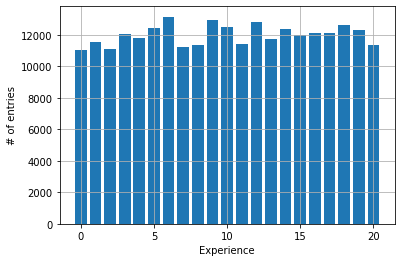

In [35]:
exp_counts = np.zeros((max(df['experience']) + 1,), dtype=int)
for i in df['experience']:
    exp_counts[i] += 1

axes = plt.axes() 
axes.set_xlabel("Experience")
axes.set_ylabel("# of entries")
plt.bar(range(len(exp_counts)), exp_counts)
plt.grid()

### 1.2.4. Column "married"

In [5]:
print(f"Data Type: {df['married'].dtype}")
print(f"Unique Values: {df['married'].drop_duplicates().to_list()}")

Data Type: object
Unique Values: ['single', 'married']


<BarContainer object of 2 artists>

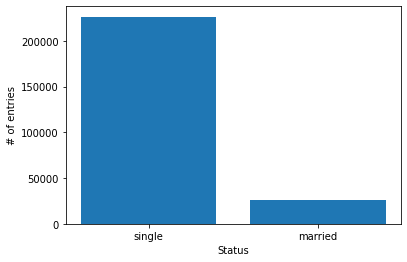

In [39]:
married_count = np.count_nonzero(df['married'] == 'married')
single_count = np.count_nonzero(df['married'] == 'single')

axes = plt.axes() 
axes.set_xlabel("Status")
axes.set_ylabel("# of entries")
plt.bar(['single', 'married'], [single_count, married_count])

### 1.2.5 Column "house_ownership"

In [6]:
print(f"Data Type: {df['house_ownership'].dtype}")
print(f"Unique Values: {df['house_ownership'].drop_duplicates().to_list()}")

Data Type: object
Unique Values: ['rented', 'norent_noown', 'owned']


<BarContainer object of 3 artists>

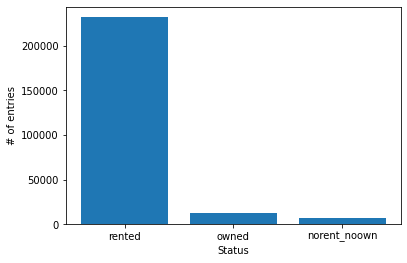

In [40]:
rented_count = np.count_nonzero(df['house_ownership'] == 'rented')
owned_count = np.count_nonzero(df['house_ownership'] == 'owned')
norent_noown_count = np.count_nonzero(df['house_ownership'] == 'norent_noown')

axes = plt.axes() 
axes.set_xlabel("Status")
axes.set_ylabel("# of entries")
plt.bar(['rented', 'owned', 'norent_noown'], [rented_count, owned_count, norent_noown_count])

### 1.2.6. Column "car_ownership"

In [7]:
print(f"Data Type: {df['car_ownership'].dtype}")
print(f"Unique Values: {df['car_ownership'].drop_duplicates().to_list()}")

Data Type: object
Unique Values: ['no', 'yes']


<BarContainer object of 2 artists>

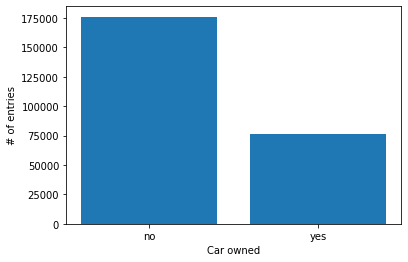

In [42]:
car_no_count = np.count_nonzero(df['car_ownership'] == 'no')
car_yes_count = np.count_nonzero(df['car_ownership'] == 'yes')

axes = plt.axes() 
axes.set_xlabel("Car owned")
axes.set_ylabel("# of entries")
plt.bar(['no', 'yes'], [car_no_count, car_yes_count])

### 1.2.7. Column "profession"

In [8]:
print(f"Data Type: {df['profession'].dtype}")
print(f"Unique Values: {df['profession'].drop_duplicates().to_list()}")

Data Type: object
Unique Values: ['Mechanical_engineer', 'Software_Developer', 'Technical_writer', 'Civil_servant', 'Librarian', 'Economist', 'Flight_attendant', 'Architect', 'Designer', 'Physician', 'Financial_Analyst', 'Air_traffic_controller', 'Politician', 'Police_officer', 'Artist', 'Surveyor', 'Design_Engineer', 'Chemical_engineer', 'Hotel_Manager', 'Dentist', 'Comedian', 'Biomedical_Engineer', 'Graphic_Designer', 'Computer_hardware_engineer', 'Petroleum_Engineer', 'Secretary', 'Computer_operator', 'Chartered_Accountant', 'Technician', 'Microbiologist', 'Fashion_Designer', 'Aviator', 'Psychologist', 'Magistrate', 'Lawyer', 'Firefighter', 'Engineer', 'Official', 'Analyst', 'Geologist', 'Drafter', 'Statistician', 'Web_designer', 'Consultant', 'Chef', 'Army_officer', 'Surgeon', 'Scientist', 'Civil_engineer', 'Industrial_Engineer', 'Technology_specialist']


### 1.2.8. Column "city"

In [9]:
print(f"Data Type: {df['city'].dtype}")
print(f"Unique Values: {df['city'].drop_duplicates().to_list()}")

Data Type: object
Unique Values: ['Rewa', 'Parbhani', 'Alappuzha', 'Bhubaneswar', 'Tiruchirappalli[10]', 'Jalgaon', 'Tiruppur', 'Jamnagar', 'Kota[6]', 'Karimnagar', 'Hajipur[31]', 'Adoni', 'Erode[17]', 'Kollam', 'Madurai', 'Anantapuram[24]', 'Kamarhati', 'Bhusawal', 'Sirsa', 'Amaravati', 'Secunderabad', 'Ahmedabad', 'Ajmer', 'Ongole', 'Miryalaguda', 'Ambattur', 'Indore', 'Pondicherry', 'Shimoga', 'Chennai', 'Gulbarga', 'Khammam', 'Saharanpur', 'Gopalpur', 'Amravati', 'Udupi', 'Howrah', 'Aurangabad[39]', 'Hospet', 'Shimla', 'Khandwa', 'Bidhannagar', 'Bellary', 'Danapur', 'Purnia[26]', 'Bijapur', 'Patiala', 'Malda', 'Sagar', 'Durgapur', 'Junagadh', 'Singrauli', 'Agartala', 'Thanjavur', 'Hindupur', 'Naihati', 'North_Dumdum', 'Panchkula', 'Anantapur', 'Serampore', 'Bathinda', 'Nadiad', 'Kanpur', 'Haridwar', 'Berhampur', 'Jamshedpur', 'Hyderabad', 'Bidar', 'Kottayam', 'Solapur', 'Suryapet', 'Aizawl', 'Asansol', 'Deoghar', 'Eluru[25]', 'Ulhasnagar', 'Aligarh', 'South_Dumdum', 'Berhampore', '

### 1.2.9. Column "state"

In [10]:
print(f"Data Type: {df['state'].dtype}")
print(f"Unique Values: {df['state'].drop_duplicates().to_list()}")

Data Type: object
Unique Values: ['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu', 'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra_Pradesh', 'West_Bengal', 'Haryana', 'Puducherry', 'Karnataka', 'Uttar_Pradesh', 'Himachal_Pradesh', 'Punjab', 'Tripura', 'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam', 'Jammu_and_Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh', 'Uttar_Pradesh[5]', 'Manipur', 'Sikkim']


### 1.2.10. Column "current_job_years"

In [11]:
print(f"Data Type: {df['current_job_years'].dtype}")
print(f"Minumum Value: {min(df['current_job_years'])}")
print(f"Maximum Value: {max(df['current_job_years'])}")
print(f"Average: {sum(df['current_job_years']) / len(df['current_job_years'])}")

Data Type: int64
Minumum Value: 0
Maximum Value: 14
Average: 6.333876984126984


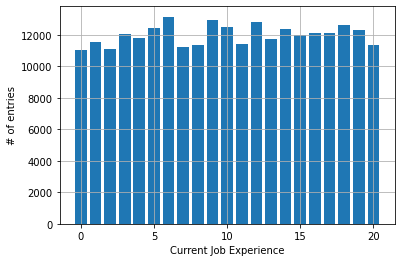

In [54]:
job_years_counts = np.zeros((max(df['experience']) + 1,), dtype=int)
for i in df['experience']:
    job_years_counts[i] += 1

axes = plt.axes() 
axes.set_xlabel("Current Job Experience")
axes.set_ylabel("# of entries")
plt.bar(range(len(job_years_counts)), job_years_counts)
plt.grid()

### 1.2.11. Column "current_house_years"

In [12]:
print(f"Data Type: {df['current_house_years'].dtype}")
print(f"Minumum Value: {min(df['current_house_years'])}")
print(f"Maximum Value: {max(df['current_house_years'])}")
print(f"Average: {sum(df['current_house_years']) / len(df['current_house_years'])}")

Data Type: int64
Minumum Value: 10
Maximum Value: 14
Average: 11.997793650793652


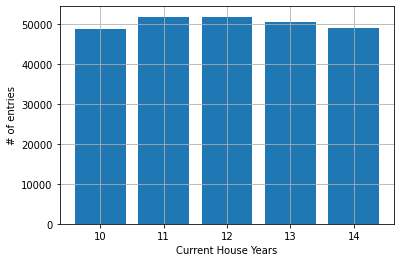

In [5]:
house_years_counts = np.zeros((max(df['current_house_years']) + 1,), dtype=int)
for i in df['current_house_years']:
    house_years_counts[i] += 1

axes = plt.axes() 
axes.set_xlabel("Current House Years")
axes.set_ylabel("# of entries")
plt.bar(range(len(house_years_counts))[min(df['current_house_years']):], house_years_counts[min(df['current_house_years']):])
plt.grid()

### 1.2.12. Column "risk_flag"

In [13]:
print(f"Data Type: {df['risk_flag'].dtype}")
print(f"Minumum Value: {min(df['risk_flag'])}")
print(f"Maximum Value: {max(df['risk_flag'])}")
print(f"Class Ratio (1/(1+0)): {sum(df['risk_flag']) / len(df['risk_flag'])}")

Data Type: int64
Minumum Value: 0
Maximum Value: 1
Class Ratio (1/(1+0)): 0.123


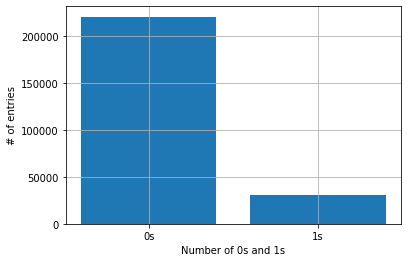

In [7]:
ones_count = sum(df['risk_flag'])
zeros_count = len(df) - ones_count

axes = plt.axes() 
axes.set_xlabel("Number of 0s and 1s")
axes.set_ylabel("# of entries")
plt.bar(['0s', '1s'], [zeros_count, ones_count])
plt.grid()

## 2. Preprocessing

### 2.1. Digitizing Columns

### 2.1.1. Already Numeric Columns

The columns given below will not be digitized because they are already numeric.

 - "income"
 - "age"
 - "experience"
 - "current_job_years"
 - "current_house_years"
 - "risk_flag"

### 2.1.2. Column "married"

Since this column alternates between "single" and "married" values, rows will be converted 0 for "single" and 1 for "married".

In [14]:
married_dict = {
    "single": 0,
    "married": 1
}

In [15]:
df["married"].replace(married_dict, inplace=True)

### 2.1.3. Column "house_ownership"

This column alternates between three different values. Each value will be replaced an enumarated value as given below.

In [16]:
house_ownership_dict = {
    "norent_noown": 0, 
    "rented": 1,
    "owned": 2
}

In [17]:
df['house_ownership'].replace(house_ownership_dict, inplace=True)

### 2.1.4. Column "car_ownership"

Since this column alternates between "yes" and "no" values, rows will be converted 0 for "no" and 1 for "yes".

In [18]:
car_ownership_dict = {
    "no": 0, 
    "yes": 1
}

In [19]:
df['car_ownership'].replace(car_ownership_dict, inplace=True)

### 2.1.5. Column "profession"

Since this column consist of many unique values, for each value, an enumarated number will be assigned based on alphabetical order of values.

In [20]:
professions = sorted(df['profession'].drop_duplicates())
professions_dict = dict(zip(professions, range(len(professions))))
professions_dict

{'Air_traffic_controller': 0,
 'Analyst': 1,
 'Architect': 2,
 'Army_officer': 3,
 'Artist': 4,
 'Aviator': 5,
 'Biomedical_Engineer': 6,
 'Chartered_Accountant': 7,
 'Chef': 8,
 'Chemical_engineer': 9,
 'Civil_engineer': 10,
 'Civil_servant': 11,
 'Comedian': 12,
 'Computer_hardware_engineer': 13,
 'Computer_operator': 14,
 'Consultant': 15,
 'Dentist': 16,
 'Design_Engineer': 17,
 'Designer': 18,
 'Drafter': 19,
 'Economist': 20,
 'Engineer': 21,
 'Fashion_Designer': 22,
 'Financial_Analyst': 23,
 'Firefighter': 24,
 'Flight_attendant': 25,
 'Geologist': 26,
 'Graphic_Designer': 27,
 'Hotel_Manager': 28,
 'Industrial_Engineer': 29,
 'Lawyer': 30,
 'Librarian': 31,
 'Magistrate': 32,
 'Mechanical_engineer': 33,
 'Microbiologist': 34,
 'Official': 35,
 'Petroleum_Engineer': 36,
 'Physician': 37,
 'Police_officer': 38,
 'Politician': 39,
 'Psychologist': 40,
 'Scientist': 41,
 'Secretary': 42,
 'Software_Developer': 43,
 'Statistician': 44,
 'Surgeon': 45,
 'Surveyor': 46,
 'Technical_w

In [21]:
df['profession'].replace(professions_dict, inplace=True)

### 2.1.6. Column "city"

Since this column consist of many unique values, for each value, an enumarated number will be assigned based on alphabetical order of values.

In [22]:
cities = sorted(df['city'].drop_duplicates())
cities_dict = dict(zip(cities, range(len(cities))))
cities_dict

{'Adoni': 0,
 'Agartala': 1,
 'Agra': 2,
 'Ahmedabad': 3,
 'Ahmednagar': 4,
 'Aizawl': 5,
 'Ajmer': 6,
 'Akola': 7,
 'Alappuzha': 8,
 'Aligarh': 9,
 'Allahabad': 10,
 'Alwar': 11,
 'Amaravati': 12,
 'Ambala': 13,
 'Ambarnath': 14,
 'Ambattur': 15,
 'Amravati': 16,
 'Amritsar': 17,
 'Amroha': 18,
 'Anand': 19,
 'Anantapur': 20,
 'Anantapuram[24]': 21,
 'Arrah': 22,
 'Asansol': 23,
 'Aurangabad': 24,
 'Aurangabad[39]': 25,
 'Avadi': 26,
 'Bahraich': 27,
 'Ballia': 28,
 'Bally': 29,
 'Bangalore': 30,
 'Baranagar': 31,
 'Barasat': 32,
 'Bardhaman': 33,
 'Bareilly': 34,
 'Bathinda': 35,
 'Begusarai': 36,
 'Belgaum': 37,
 'Bellary': 38,
 'Berhampore': 39,
 'Berhampur': 40,
 'Bettiah[33]': 41,
 'Bhagalpur': 42,
 'Bhalswa_Jahangir_Pur': 43,
 'Bharatpur': 44,
 'Bhatpara': 45,
 'Bhavnagar': 46,
 'Bhilai': 47,
 'Bhilwara': 48,
 'Bhimavaram': 49,
 'Bhind': 50,
 'Bhiwandi': 51,
 'Bhiwani': 52,
 'Bhopal': 53,
 'Bhubaneswar': 54,
 'Bhusawal': 55,
 'Bidar': 56,
 'Bidhannagar': 57,
 'Bihar_Sharif': 58,

In [23]:
df['city'].replace(cities_dict, inplace=True)

### 2.1.7. Column "state"

Since this column consist of many unique values, for each value, an enumarated number will be assigned based on alphabetical order of values.

In [24]:
states = sorted(df['state'].drop_duplicates())
states_dict = dict(zip(states, range(len(states))))
states_dict

{'Andhra_Pradesh': 0,
 'Assam': 1,
 'Bihar': 2,
 'Chandigarh': 3,
 'Chhattisgarh': 4,
 'Delhi': 5,
 'Gujarat': 6,
 'Haryana': 7,
 'Himachal_Pradesh': 8,
 'Jammu_and_Kashmir': 9,
 'Jharkhand': 10,
 'Karnataka': 11,
 'Kerala': 12,
 'Madhya_Pradesh': 13,
 'Maharashtra': 14,
 'Manipur': 15,
 'Mizoram': 16,
 'Odisha': 17,
 'Puducherry': 18,
 'Punjab': 19,
 'Rajasthan': 20,
 'Sikkim': 21,
 'Tamil_Nadu': 22,
 'Telangana': 23,
 'Tripura': 24,
 'Uttar_Pradesh': 25,
 'Uttar_Pradesh[5]': 26,
 'Uttarakhand': 27,
 'West_Bengal': 28}

In [25]:
df['state'] = df['state'].replace(states_dict)

### 2.2. Finalizing Data

In [26]:
data_arr = df.to_numpy()
X = data_arr[:, :-1]
y = data_arr[:, -1]

I save data for the model.

In [27]:
import pickle

with open("X.pickle", "wb") as x_file:
    pickle.dump(X, x_file)
with open("y.pickle", "wb") as y_file:
    pickle.dump(y, y_file)

## 3. Training Model

Imports

In [28]:
import pickle
import time

import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

Variables

In [29]:
TEST_SPLIT_PERCENT = 0.2
KERNEL = 'rbf'
C = 1
GAMMA = 10
CLASS_WEIGHT = 'balanced'
CACHE_SIZE = 1000  # MB
MODEL_NAME = f"CRP_{int(time.time())}"  # Credit Rist Prediction 

### 3.1. Loading and Splitting Data

In [30]:
with open("X.pickle", "rb") as x_file:
    X = pickle.load(x_file)

with open("y.pickle", "rb") as y_file:
    y = pickle.load(y_file)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SPLIT_PERCENT)

### 3.2. Creating Model

In [31]:
model = make_pipeline(
    StandardScaler(), 
    svm.SVC(kernel=KERNEL,
            C=C,
            gamma=GAMMA, 
            class_weight=CLASS_WEIGHT, 
            cache_size=CACHE_SIZE, 
            verbose=True)
)

### 3.3. Training model

In [32]:
model.fit(X_train, y_train)

[LibSVM]

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=1, cache_size=1000, class_weight='balanced', gamma=10,
                     verbose=True))])

### 3.4. Validation of Model

In [33]:
predictions = model.predict(X_test)

In [34]:
correct_predictions = y_test[predictions == y_test]
accuracy = len(correct_predictions) / len(y_test)

print(f"Accuracy: {accuracy}")

Accuracy: 0.8973214285714286


### 3.5. Overfitting Check

In [35]:
correct_predicted_1s = np.count_nonzero(correct_predictions)
correct_predicted_0s = len(correct_predictions) - correct_predicted_1s
count_1s = np.count_nonzero(y_test)
count_0s = len(y_test) - count_1s

print(f"Correct classified 1s count: {correct_predicted_1s}")
print(f"Correct classified 0s count: {correct_predicted_0s}")
print(f"classification ratio (1s/0s): {correct_predicted_1s / correct_predicted_0s}")
print(f"Sample class ratio (1s/0s): {count_1s / count_0s}")

Correct classified 1s count: 4751
Correct classified 0s count: 40474
classification ratio (1s/0s): 0.11738399960468449
Sample class ratio (1s/0s): 0.13888010123378677


### 3.6. Save The Model

In [36]:
with open(f"{MODEL_NAME}_{accuracy:.3f}.model", "wb") as model_file:
    pickle.dump(model, model_file)